# Electricity Usage Report of Manipur on a Monthly and Annual Basis
### By: Michelle Intan Handa

In this report, I will make an electricity report of **Manipur** on a monthly and annual basis. I will also analyze whether Manipur's electricity usage is influenced by some of the surrounding cities.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Data Preprocessing

In [2]:
#import data
city = pd.read_csv("cities_electricity_usage.csv")
city.head()

,States,Regions,latitude,longitude,Dates,Usage
0,Punjab,NR,31.519974,75.980003,02/01/2019 00:00:00,119.9
1,Haryana,NR,28.450006,77.019991,02/01/2019 00:00:00,130.3
2,Rajasthan,NR,26.449999,74.639981,02/01/2019 00:00:00,234.1
3,Delhi,NR,28.669993,77.230004,02/01/2019 00:00:00,85.8
4,UP,NR,27.599981,78.050006,02/01/2019 00:00:00,313.9


In [3]:
#check datatypes
city.dtypes

States        object
Regions       object
latitude     float64
longitude    float64
Dates         object
Usage        float64
dtype: object

`Dates` datatype is still object, I need to change it into datetime.

In [4]:
#check unique value
city.Regions.unique()

array(['NR', 'WR', 'SR', 'ER', 'NER'], dtype=object)

Because `Regions` only consists of 5 unique value, I will change the datatype into category.

In [5]:
#change datatype
city['Dates'] = city['Dates'].astype('datetime64')
city['Regions'] = city['Regions'].astype('category')
city.dtypes

States               object
Regions            category
latitude            float64
longitude           float64
Dates        datetime64[ns]
Usage               float64
dtype: object

For further analysis, I am going to extract the month and year component of `Dates`.

In [6]:
#extract month and year
city ['year'] = city['Dates'].dt.year
city['month'] = city['Dates'].dt.to_period('M')
city['monthz'] = city['Dates'].dt.month
city['day'] = city['Dates'].dt.day
city.head()

,States,Regions,latitude,longitude,Dates,Usage,year,month,monthz,day
0,Punjab,NR,31.519974,75.980003,2019-02-01,119.9,2019,2019-02,2,1
1,Haryana,NR,28.450006,77.019991,2019-02-01,130.3,2019,2019-02,2,1
2,Rajasthan,NR,26.449999,74.639981,2019-02-01,234.1,2019,2019-02,2,1
3,Delhi,NR,28.669993,77.230004,2019-02-01,85.8,2019,2019-02,2,1
4,UP,NR,27.599981,78.050006,2019-02-01,313.9,2019,2019-02,2,1


Because I want to analyze Manipur, I am going to filter the data.

In [7]:
#make a new data frame consisting only Manipur
manipur = city[city.States == 'Manipur']
manipur.head()

,States,Regions,latitude,longitude,Dates,Usage,year,month,monthz,day
28,Manipur,NER,24.799971,93.950017,2019-02-01,2.7,2019,2019-02,2,1
61,Manipur,NER,24.799971,93.950017,2019-03-01,2.4,2019,2019-03,3,1
94,Manipur,NER,24.799971,93.950017,2019-04-01,2.4,2019,2019-04,4,1
127,Manipur,NER,24.799971,93.950017,2019-05-01,2.7,2019,2019-05,5,1
160,Manipur,NER,24.799971,93.950017,2019-06-01,2.7,2019,2019-06,6,1


### Manipur's Annual Electricity Usage Report

In [8]:
#annually Manipur electicity usage report 
manipur_usage = manipur.drop(['States', 'Regions', 'latitude', 'longitude'], axis = 1).reset_index()
manipur_usage_index = manipur_usage.drop('index', axis = 1)
manipur_usage_index

,Dates,Usage,year,month,monthz,day
0,2019-02-01,2.7,2019,2019-02,2,1
1,2019-03-01,2.4,2019,2019-03,3,1
2,2019-04-01,2.4,2019,2019-04,4,1
3,2019-05-01,2.7,2019,2019-05,5,1
4,2019-06-01,2.7,2019,2019-06,6,1
...,...,...,...,...,...,...
498,2020-01-12,2.1,2020,2020-01,1,12
499,2020-02-12,2.4,2020,2020-02,2,12
500,2020-03-12,2.3,2020,2020-03,3,12
501,2020-04-12,2.5,2020,2020-04,4,12


In [9]:
# electricity usage in 2019
manipur_2019 = manipur_usage_index[manipur_usage_index['year'] == 2019]
manipur_2019

,Dates,Usage,year,month,monthz,day
0,2019-02-01,2.7,2019,2019-02,2,1
1,2019-03-01,2.4,2019,2019-03,3,1
2,2019-04-01,2.4,2019,2019-04,4,1
3,2019-05-01,2.7,2019,2019-05,5,1
4,2019-06-01,2.7,2019,2019-06,6,1
...,...,...,...,...,...,...
354,2019-12-27,2.6,2019,2019-12,12,27
355,2019-12-28,2.5,2019,2019-12,12,28
356,2019-12-29,2.4,2019,2019-12,12,29
357,2019-12-30,2.4,2019,2019-12,12,30


Text(0, 0.5, 'Electricity Usage')

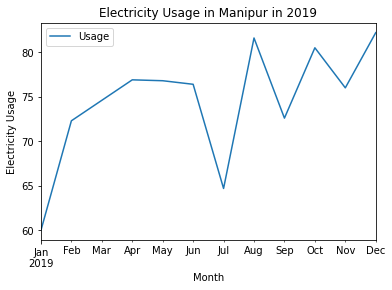

In [10]:
# plot of electricity usage in 2019
manipur_2019.groupby('month').sum()[['Usage']].plot()
plt.title('Electricity Usage in Manipur in 2019')
plt.xlabel('Month')
plt.ylabel('Electricity Usage')

Text(0, 0.5, 'Electricity Usage')

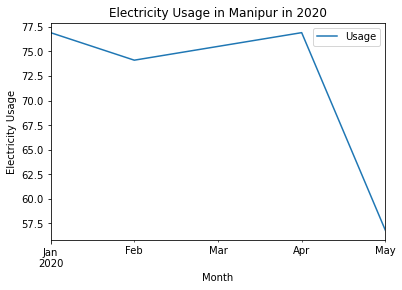

In [11]:
#electricity usage in 2020
manipur_2020 = manipur_usage_index[manipur_usage_index['year'] == 2020]
manipur_2020.groupby('month').sum()[['Usage']].plot()
plt.title('Electricity Usage in Manipur in 2020')
plt.xlabel('Month')
plt.ylabel('Electricity Usage')

Text(0, 0.5, 'Electricity Usage')

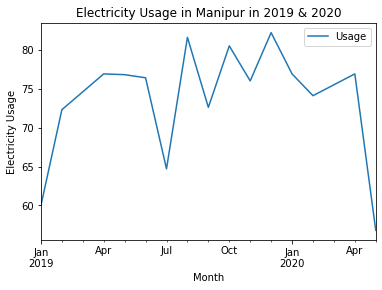

In [12]:
# plot of electricity in 2019 and 2020 compiled
manipur_usage_index.groupby('month').sum()[['Usage']].plot()
plt.title('Electricity Usage in Manipur in 2019 & 2020')
plt.xlabel('Month')
plt.ylabel('Electricity Usage')

From the plot above, we could see that Manipur's electricity usage experienced a significant increase in February and July 2019. However, Manipur's electricity usage dropped in May 2020.

### Manipur's Monthly Electricity Usage Report

I am going to see the lowest Manipur's electricity usage which is on May 2020.

In [13]:
#monthly electricity report on May 2020
manipur_may = manipur_2020 [manipur_2020.monthz == 5]
manipur_may.head()

,Dates,Usage,year,month,monthz,day
363,2020-05-01,2.6,2020,2020-05,5,1
387,2020-05-02,2.5,2020,2020-05,5,2
409,2020-05-03,2.7,2020,2020-05,5,3
433,2020-05-04,2.5,2020,2020-05,5,4
456,2020-05-05,2.4,2020,2020-05,5,5


In [14]:
x = manipur_may.day
y = manipur_may.Usage

manipur_usage_may = pd.DataFrame(list(zip(x,y)),
                                columns = ['Day', 'Electricity Usage'])

manipur_usage_may = manipur_usage_may.set_index('Day')
manipur_usage_may.head()

,Electricity Usage
Day,
1,2.6
2,2.5
3,2.7
4,2.5
5,2.4


Text(0, 0.5, 'Electricity Usage')

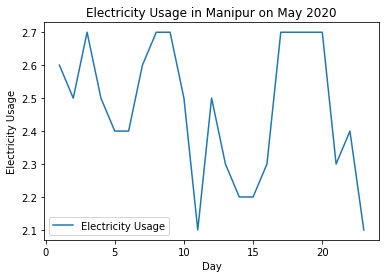

In [16]:
manipur_usage_may.sort_values('Day').plot()
plt.title('Electricity Usage in Manipur on May 2020')
plt.xlabel('Day')
plt.ylabel('Electricity Usage')

I'm going to compare Manipur's electricity usage on May 2020 and December 2019 which is the highest amount of Manipur's electricity usage.

In [17]:
#monthly electricity report on Dec 2019
manipur_dec = manipur_2019 [manipur_2019.monthz == 12]
manipur_dec.head()

,Dates,Usage,year,month,monthz,day
10,2019-12-01,2.5,2019,2019-12,12,1
40,2019-12-02,2.5,2019,2019-12,12,2
67,2019-12-03,2.7,2019,2019-12,12,3
97,2019-12-04,2.4,2019,2019-12,12,4
126,2019-12-05,2.6,2019,2019-12,12,5


In [18]:
x = manipur_dec.day
y = manipur_dec.Usage

manipur_usage_dec = pd.DataFrame(list(zip(x,y)),
                                columns = ['Day', 'Electricity Usage'])

manipur_usage_dec = manipur_usage_dec.set_index('Day')
manipur_usage_dec.head()

,Electricity Usage
Day,
1,2.5
2,2.5
3,2.7
4,2.4
5,2.6


Text(0, 0.5, 'Electricity Usage')

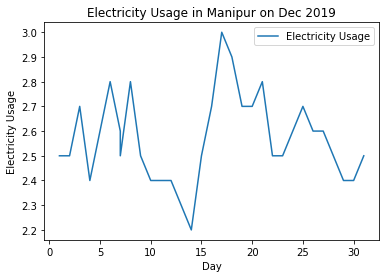

In [19]:
manipur_usage_dec.sort_values('Day').plot()
plt.title('Electricity Usage in Manipur on Dec 2019')
plt.xlabel('Day')
plt.ylabel('Electricity Usage')

From both plot, we could see that Manipur's electricity usage at the May 2020 tends to decrease while at the end of December 2019 tends to increase.

## compare the electricity usage with other neighboring cities (NER Region)

Manipur is included in the NER region, so I am going to filter and only select the NER region.

In [29]:
city_ner = city [city.Regions == 'NER']
city_ner

,States,Regions,latitude,longitude,Dates,Usage,year,month,monthz,day
26,Arunachal Pradesh,NER,27.100399,93.616601,2019-02-01,2.1,2019,2019-02,2,1
27,Assam,NER,26.749981,94.216667,2019-02-01,21.7,2019,2019-02,2,1
28,Manipur,NER,24.799971,93.950017,2019-02-01,2.7,2019,2019-02,2,1
29,Meghalaya,NER,25.570492,91.880014,2019-02-01,6.1,2019,2019-02,2,1
30,Mizoram,NER,23.710399,92.720015,2019-02-01,1.9,2019,2019-02,2,1
...,...,...,...,...,...,...,...,...,...,...
16594,Manipur,NER,24.799971,93.950017,2020-05-12,2.5,2020,2020-05,5,12
16595,Meghalaya,NER,25.570492,91.880014,2020-05-12,5.8,2020,2020-05,5,12
16596,Mizoram,NER,23.710399,92.720015,2020-05-12,1.6,2020,2020-05,5,12
16597,Nagaland,NER,25.666998,94.116570,2020-05-12,2.1,2020,2020-05,5,12


In [21]:
#check what are the neighboring states of Manipur
city_ner.States.unique()

array(['Arunachal Pradesh', 'Assam', 'Manipur', 'Meghalaya', 'Mizoram',
       'Nagaland', 'Tripura'], dtype=object)

Manipur neighboring country is Arunachal Pradesh, Assam, Meghalaya, Mizoram, Nagaland, Tripura. But I am going to analyze only Mizoram and Meghalaya.

In [30]:
neighbor = city_ner [(city.States == 'Meghalaya') | (city.States == 'Mizoram') | (city.States == 'Manipur')]
neighbor

C:\Users\ASUS\AppData\Local\Temp\ipykernel_18224\3715952928.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  neighbor = city_ner [(city.States == 'Meghalaya') | (city.States == 'Mizoram') | (city.States == 'Manipur')]


,States,Regions,latitude,longitude,Dates,Usage,year,month,monthz,day
28,Manipur,NER,24.799971,93.950017,2019-02-01,2.7,2019,2019-02,2,1
29,Meghalaya,NER,25.570492,91.880014,2019-02-01,6.1,2019,2019-02,2,1
30,Mizoram,NER,23.710399,92.720015,2019-02-01,1.9,2019,2019-02,2,1
61,Manipur,NER,24.799971,93.950017,2019-03-01,2.4,2019,2019-03,3,1
62,Meghalaya,NER,25.570492,91.880014,2019-03-01,6.5,2019,2019-03,3,1
...,...,...,...,...,...,...,...,...,...,...
16562,Meghalaya,NER,25.570492,91.880014,2020-04-12,5.7,2020,2020-04,4,12
16563,Mizoram,NER,23.710399,92.720015,2020-04-12,1.6,2020,2020-04,4,12
16594,Manipur,NER,24.799971,93.950017,2020-05-12,2.5,2020,2020-05,5,12
16595,Meghalaya,NER,25.570492,91.880014,2020-05-12,5.8,2020,2020-05,5,12


Text(0, 0.5, 'Electricity Usage')

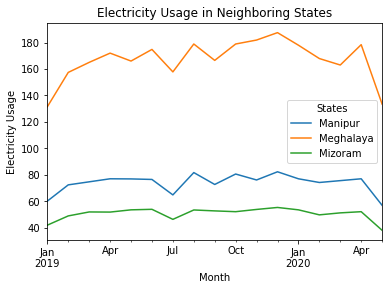

In [22]:
neighbor_usage = neighbor.pivot_table(
    index = 'month',
    columns = 'States',
    values = 'Usage',
    aggfunc = 'sum')
neighbor_usage.plot()
plt.title('Electricity Usage in Neighboring States')
plt.xlabel('Month')
plt.ylabel('Electricity Usage')

<AxesSubplot:xlabel='Dates'>

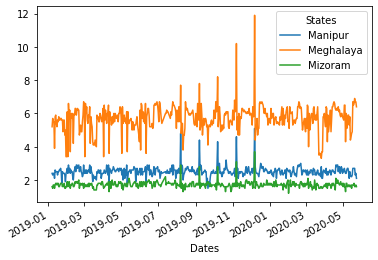

In [23]:
neighbor_usage_day = neighbor.pivot_table(
    index = 'Dates',
    columns = 'States',
    values = 'Usage',
    aggfunc = 'sum')

neighbor_usage_day.plot()

From the 2 plots above, we could see that the electricity usage of Manipur, Meghalaya and Mizoram is pretty similar and they has the same pattern. But, Meghalaya has the highest electricity usage between those two.

Now, I am going to compare the electricity usage of all NER countries.

Text(0.5, 1.0, 'on 01-05-2020 until 03-05-2020')

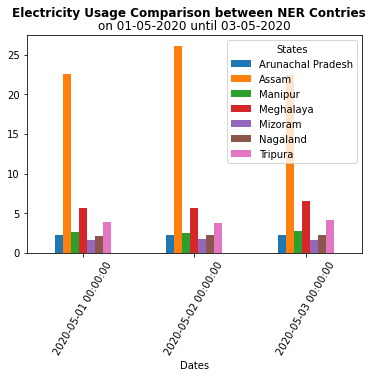

In [31]:
neighbor_2020 = city_ner[(city_ner.year == 2020) & 
                         (city_ner.monthz == 5) &
                         ((city_ner.day == 1) | 
                          (city_ner.day == 2) | 
                          (city_ner.day == 3))]

neighbor_usage_2020 = neighbor_2020.pivot_table(
    index = 'Dates',
    columns = 'States',
    values = 'Usage',
    aggfunc = 'sum')
neighbor_usage_2020.plot(kind = 'bar', rot = 60)

plt.suptitle('Electricity Usage Comparison between NER Contries', 
             fontsize=12, fontweight='bold')
plt.title('on 01-05-2020 until 03-05-2020')

From the plot above, we could see that Assam has the highest electricity usage among all NER countries.

<AxesSubplot:xlabel='Dates'>

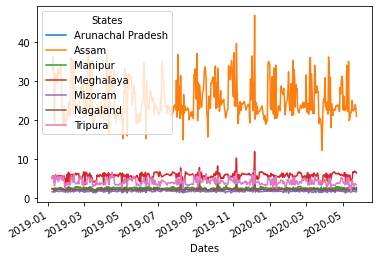

In [32]:
ner_usage_day = city_ner.pivot_table(
    index = 'Dates',
    columns = 'States',
    values = 'Usage',
    aggfunc = 'sum')

ner_usage_day.plot()

From the plot above, we could see that all of the NER countries has the same pattern of electricity usage.

In [25]:
neighbor_usage_day = neighbor.pivot_table(
    index = 'Dates',
    columns = 'States',
    values = 'Usage',
    aggfunc = 'sum')

Text(0.5, 1.0, 'with Regression Line')

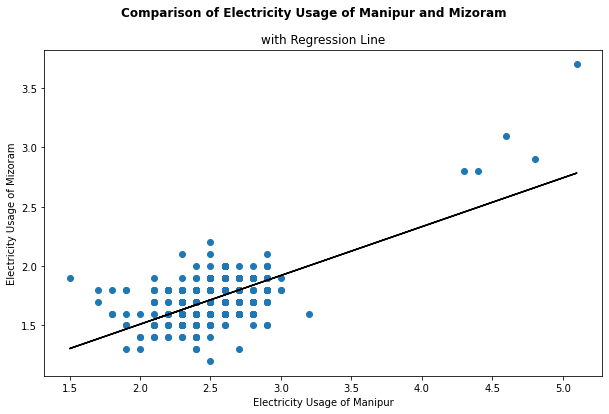

In [26]:
#correlation between electricity usage of those neigboring states
plt.figure(figsize=(10,6))
plt.scatter(neighbor_usage_day ['Manipur'], neighbor_usage_day['Mizoram'])

slope, intercept = np.polyfit(neighbor_usage_day ['Manipur'],
                             neighbor_usage_day ['Mizoram'], 1)
regression_line = np.polyval([slope, intercept], neighbor_usage_day['Manipur'])
plt.plot(neighbor_usage_day['Manipur'], 
         regression_line,
         color = 'black', 
         label = 'Regression Line')

plt.xlabel('Electricity Usage of Manipur')
plt.ylabel('Electricity Usage of Mizoram')
plt.suptitle('Comparison of Electricity Usage of Manipur and Mizoram',
            fontsize = 12, fontweight = 'bold')
plt.title('with Regression Line')

Text(0.5, 1.0, 'with Regression Line')

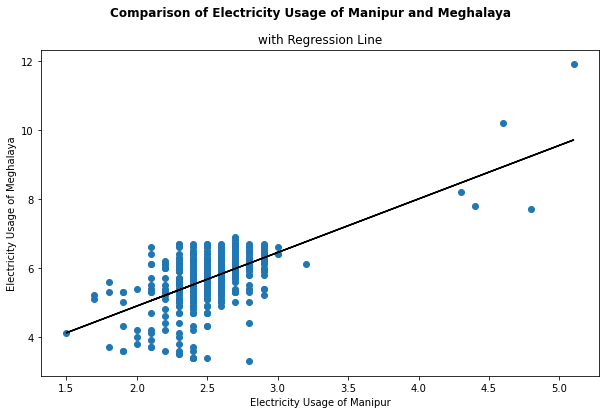

In [27]:
plt.figure(figsize=(10,6))
plt.scatter(neighbor_usage_day ['Manipur'], neighbor_usage_day['Meghalaya'])

slope, intercept = np.polyfit(neighbor_usage_day ['Manipur'],
                             neighbor_usage_day ['Meghalaya'], 1)
regression_line = np.polyval([slope, intercept], neighbor_usage_day['Manipur'])
plt.plot(neighbor_usage_day['Manipur'], 
         regression_line,
         color = 'black', 
         label = 'Regression Line')

plt.xlabel('Electricity Usage of Manipur')
plt.ylabel('Electricity Usage of Meghalaya')
plt.suptitle('Comparison of Electricity Usage of Manipur and Meghalaya',
            fontsize = 12, fontweight = 'bold')
plt.title('with Regression Line')

From the two scatter plot above, we could see that the electricity usage between Manipur and Mizoram, and Manipur and Meghalaya has a positive correlation. This means that when Manipur's electricity usage increased, Mizoram and Meghalaya's electricity usage tends to increase also. We could say that the same thing also happen with other neighboring NER country. 

### Conclusion

We could conclude that Manipur's electricity usage is highly influenced by other neighboring countries. This is due to the interconnection of electrical grids which allows for the transfer of power between different regions. These interconnections enable cities and regions to balance their electricity supply and demand, especially during peak periods or in the case of emergencies.